34
34
0       84
1       84
2     82.1
3     85.1
4     84.4
5     85.1
6     84.9
7     86.7
8     83.6
9     84.2
10    84.1
11    82.5
12    83.3
13    84.1
14    84.9
15    86.1
16    83.9
17    83.9
18    83.9
19    83.5
20    86.4
21    84.6
22    83.3
23    83.4
24    84.2
25      83
26    84.6
27      86
28    83.9
29    83.4
30    82.5
31    83.8
32    83.7
33    86.3
Name: Female life expectancy, (2012-14), dtype: object
34


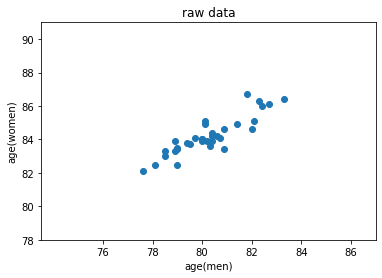

In [9]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
pd_reader = pd.read_csv("data2/data/london-borough-profiles-jan2018.csv",encoding = 'unicode_escape')
man_age = pd_reader["Male life expectancy, (2012-14)"]
woman_age = pd_reader["Female life expectancy, (2012-14)"]



# Handling missing values
man_age = man_age.fillna(80)
man_age[1] = 80
print(len(man_age))
X = [float(x) for x in man_age]
print(len(X))


woman_age = woman_age.fillna(84)
woman_age[1] = 84
print(woman_age)
Y = [float(x) for x in woman_age]
print(len(Y))




plt.xlabel("age(men)")
plt.ylabel("age(women)")
plt.title("raw data")
locator = MultipleLocator(2)

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.yaxis.set_major_locator(locator)
plt.xlim(73.5,87)
plt.ylim(78,91)
plt.scatter(X,Y)
plt.show()


# 3.2  Partition the data

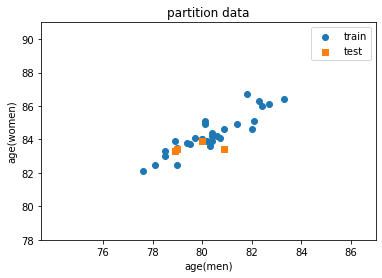

In [10]:
from sklearn import model_selection
import numpy as np

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.10)


plt.xlabel("age(men)")
plt.ylabel("age(women)")
plt.title("partition data")
locator = MultipleLocator(2)

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.yaxis.set_major_locator(locator)
plt.xlim(73.5,87)
plt.ylim(78,91)

plt.scatter(x_train,y_train,label = 'train')
plt.scatter(x_test,y_test,label = 'test',marker="s")
plt.legend()
plt.show()

# 3.3 Generate a synthetic dataset

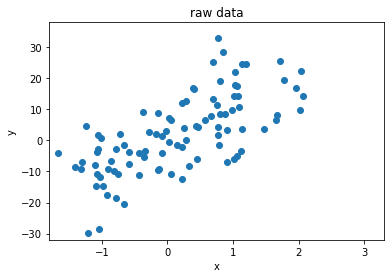

In [4]:
from sklearn import datasets
x, y, p = datasets.make_regression(n_samples=100, n_features=1, n_informative = 1, noise = 10, coef = True)

plt.xlabel("x")
plt.ylabel("y")
plt.title("raw data")
# locator = MultipleLocator(3)

# ax = plt.gca()
# ax.xaxis.set_major_locator(locator)
# ax.yaxis.set_major_locator(locator)
plt.xlim(-1.8,3.3)
plt.ylim(-32,38)
plt.scatter(x,y)
plt.show()


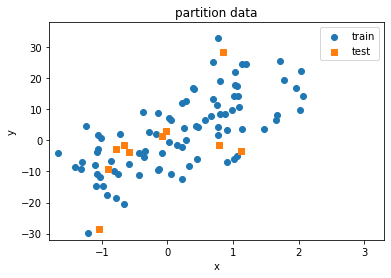

In [5]:
from sklearn import model_selection
import numpy as np

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.10)


plt.xlabel("x")
plt.ylabel("y")
plt.title("partition data")
locator = MultipleLocator(2)

plt.xlim(-1.8,3.3)
plt.ylim(-32,38)


plt.scatter(x_train,y_train,label = 'train')
plt.scatter(x_test,y_test,label = 'test',marker="s")

plt.legend()
plt.show()

# Linear Regression

## 4.1 Solving Linear Regression with Gradient Descent

In [6]:
def gradient_descent_2(M, x,w ,y ,a):
    for j in range(1,M):
        y1 = w[0] +w[1] * x[j]
        e = y[j] - y1
        w[0] = w[0] + a * e * (1/M)
        w[1] = w[1] + a * e * x[j] * (1/M)
    return w
    
def compute_error (M, x, w, y):
    error = 0
    for j in range(1, M):
        y1 = w[0] +w[1] * x[j]
        error += pow(y[j] - y1)
    error = error /M
    return error